Dataset Overview:
- Each row represents a single student.
- Features describe study behavior and classroom engagement.
- 'total_score' is the student's final numeric score.
- 'risk_level' classifies students into High, Medium, or Low academic risk.

Feature sample (first 5 rows):


,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score,grade,risk_level
0,1,18.5,95.6,3.8,97.9,A,Low Risk
1,2,14.0,80.0,2.5,83.9,B,Low Risk
2,3,19.5,86.3,5.3,100.0,A,Low Risk
3,4,25.7,70.2,7.0,100.0,A,Low Risk
4,5,13.4,81.9,6.9,92.0,A,Low Risk



Risk level distribution (% of students):


risk_level
Low Risk       73.09
Medium Risk    18.34
High Risk       8.57
Name: proportion, dtype: float64


Model Inputs:
- Number of features: 3
- Number of samples: 1000000

Train/Test Split Summary:
- Classification: 800000 train / 200000 test
- Regression: 800000 train / 200000 test

Training classification model (Random Forest)...

Classification Report:
              precision    recall  f1-score   support

   High Risk       0.55      0.51      0.53     17145
    Low Risk       0.88      0.91      0.89    146180
 Medium Risk       0.44      0.39      0.41     36675

    accuracy                           0.78    200000
   macro avg       0.62      0.60      0.61    200000
weighted avg       0.77      0.78      0.77    200000



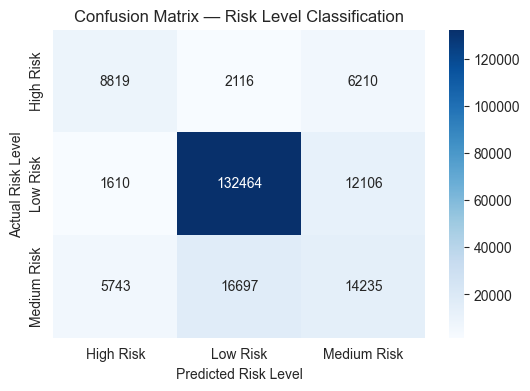

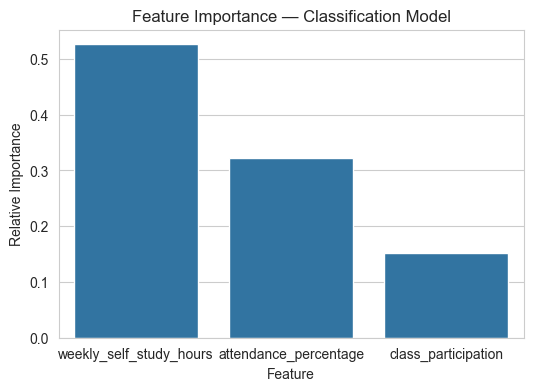


Training regression model (Random Forest)...

Regression Performance:
- RMSE: 9.06
  (Average prediction error in final score points)
- R² Score: 0.65
  (Proportion of variance explained by the model)


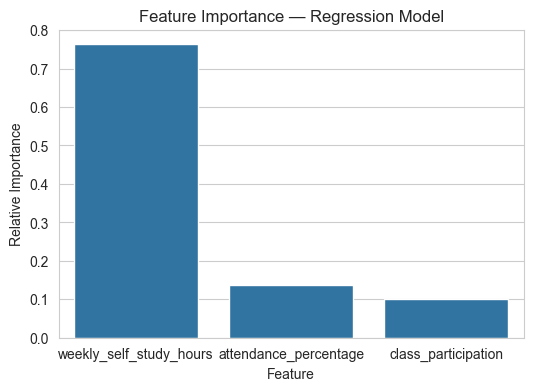


MODEL SUMMARY
- Study hours and attendance are the strongest predictors of student success.
- Classification performance is suitable for identifying high-risk students.
- Regression model explains a significant portion of score variability.
- Models serve as strong baselines for further tuning and explainability.


In [1]:
# 03_modeling.ipynb
# Baseline ML Modeling & Evaluation
# Imports & Jupyter Setup
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    mean_squared_error,
    r2_score
)

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

%matplotlib inline
sns.set_style("whitegrid")

# Load Processed Dataset
df = pd.read_csv("../data/processed/student_performance_processed.csv")

print("Dataset Overview:")
print("- Each row represents a single student.")
print("- Features describe study behavior and classroom engagement.")
print("- 'total_score' is the student's final numeric score.")
print("- 'risk_level' classifies students into High, Medium, or Low academic risk.\n")

print("Feature sample (first 5 rows):")
display(df.head())

print("\nRisk level distribution (% of students):")
display((df["risk_level"].value_counts(normalize=True) * 100).round(2))

# Feature & Target Selection
feature_cols = [
    "weekly_self_study_hours",
    "attendance_percentage",
    "class_participation"
]

X = df[feature_cols]

# Targets
y_risk = df["risk_level"]      # Classification target
y_score = df["total_score"]    # Regression target

print("\nModel Inputs:")
print(f"- Number of features: {X.shape[1]}")
print(f"- Number of samples: {X.shape[0]}")

# Feature Scaling & Splits
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Classification split (preserves risk distribution)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_scaled,
    y_risk,
    test_size=0.2,
    random_state=42,
    stratify=y_risk
)

# Regression split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_scaled,
    y_score,
    test_size=0.2,
    random_state=42
)

print("\nTrain/Test Split Summary:")
print(f"- Classification: {X_train_clf.shape[0]} train / {X_test_clf.shape[0]} test")
print(f"- Regression: {X_train_reg.shape[0]} train / {X_test_reg.shape[0]} test")

# Classification Model
print("\nTraining classification model (Random Forest)...")

clf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

clf.fit(X_train_clf, y_train_clf)
y_pred_clf = clf.predict(X_test_clf)

print("\nClassification Report:")
print(classification_report(y_test_clf, y_pred_clf))

# Confusion Matrix
cm = confusion_matrix(y_test_clf, y_pred_clf)

plt.figure(figsize=(6, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=clf.classes_,
    yticklabels=clf.classes_
)
plt.xlabel("Predicted Risk Level")
plt.ylabel("Actual Risk Level")
plt.title("Confusion Matrix — Risk Level Classification")
plt.show()

# Feature Importance (Classification)
clf_importance = pd.Series(
    clf.feature_importances_,
    index=feature_cols
).sort_values(ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x=clf_importance.index, y=clf_importance.values)
plt.title("Feature Importance — Classification Model")
plt.ylabel("Relative Importance")
plt.xlabel("Feature")
plt.show()

# Regression Model
print("\nTraining regression model (Random Forest)...")

reg = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

reg.fit(X_train_reg, y_train_reg)
y_pred_reg = reg.predict(X_test_reg)

# Metrics
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_reg, y_pred_reg)

print("\nRegression Performance:")
print(f"- RMSE: {rmse:.2f}")
print("  (Average prediction error in final score points)")
print(f"- R² Score: {r2:.2f}")
print("  (Proportion of variance explained by the model)")

# Feature Importance (Regression)
reg_importance = pd.Series(
    reg.feature_importances_,
    index=feature_cols
).sort_values(ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x=reg_importance.index, y=reg_importance.values)
plt.title("Feature Importance — Regression Model")
plt.ylabel("Relative Importance")
plt.xlabel("Feature")
plt.show()

# Modeling Summary
print("\nMODEL SUMMARY")
print("- Study hours and attendance are the strongest predictors of student success.")
print("- Classification performance is suitable for identifying high-risk students.")
print("- Regression model explains a significant portion of score variability.")
print("- Models serve as strong baselines for further tuning and explainability.")
